In [117]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import joblib
from sklearn.linear_model import LogisticRegression

In [118]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/WineQT.csv"
df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


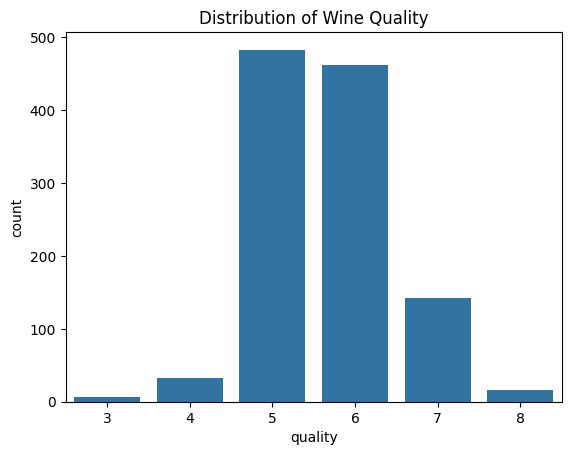

In [119]:
df.info()
df.describe()
sns.countplot(x='quality', data=df)
plt.title("Distribution of Wine Quality")
plt.show()

In [120]:
def quality_to_label(q):
    if q <= 4:
        return 'low'
    elif q <= 6:
        return 'medium'
    else:
        return 'high'

df['quality_label'] = df['quality'].apply(quality_to_label)
df['quality_label'].value_counts()

,count
quality_label,
medium,945
high,159
low,39


In [121]:
X = df.drop(['quality', 'quality_label'], axis=1)
y_reg = df['quality']
y_clf = df['quality_label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_reg_train, y_reg_test, y_clf_train, y_clf_test = train_test_split(
    X_scaled, y_reg, y_clf, test_size=0.2, random_state=42
)

In [123]:
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_train, y_reg_train)
y_reg_pred = reg_model.predict(X_test)

Mean Squared Error: 0.30
R² Score: 0.47


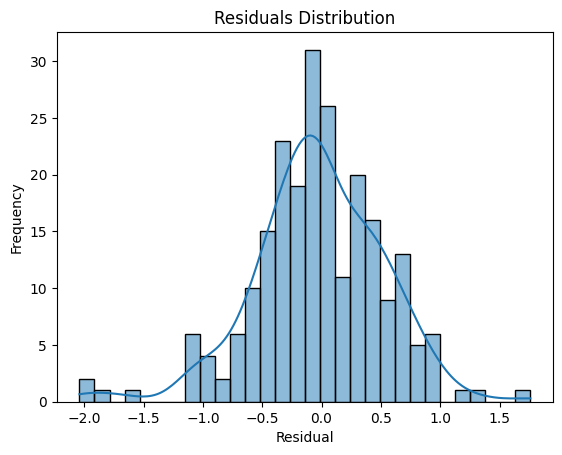

In [124]:
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

residuals = y_reg_test - y_reg_pred
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

In [125]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_clf_train)
y_clf_pred = clf_model.predict(X_test)

Accuracy: 0.8995633187772926

Classification Report:
               precision    recall  f1-score   support

        high       0.72      0.64      0.68        28
         low       0.00      0.00      0.00         6
      medium       0.92      0.96      0.94       195

    accuracy                           0.90       229
   macro avg       0.55      0.54      0.54       229
weighted avg       0.87      0.90      0.89       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


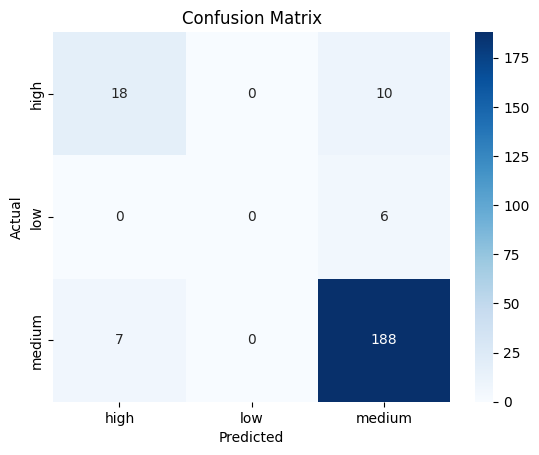

In [126]:
print("Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("\nClassification Report:\n", classification_report(y_clf_test, y_clf_pred))

conf_mat = confusion_matrix(y_clf_test, y_clf_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=clf_model.classes_, yticklabels=clf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [127]:
joblib.dump(clf_model, "wine_quality_rf_classifier.pkl")

['wine_quality_rf_classifier.pkl']

In [128]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200]
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_clf_train)
best_logreg = grid_search.best_estimator_
y_logreg_pred = best_logreg.predict(X_test)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
Accuracy: 0.8777292576419214

Classification Report:
               precision    recall  f1-score   support

        high       0.67      0.43      0.52        28
         low       0.00      0.00      0.00         6
      medium       0.90      0.97      0.93       195

    accuracy                           0.88       229
   macro avg       0.52      0.47      0.48       229
weighted avg       0.84      0.88      0.86       229



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


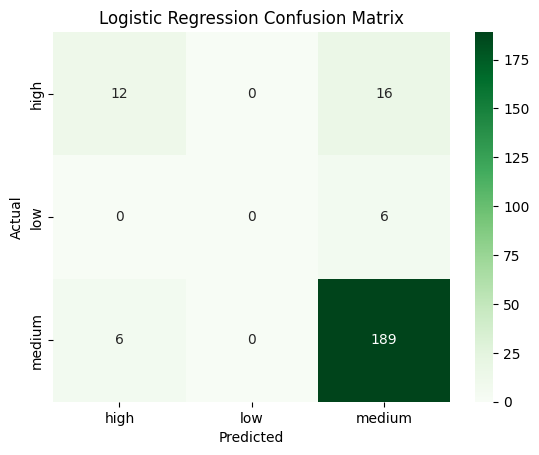

In [129]:
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_clf_test, y_logreg_pred))
print("\nClassification Report:\n", classification_report(y_clf_test, y_logreg_pred))

conf_mat = confusion_matrix(y_clf_test, y_logreg_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels=best_logreg.classes_, yticklabels=best_logreg.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()